# Wrangle and Analyze Data : WeRateDogs

## 1. Gathering Data

### 1.1. Loading WeRateDogs Twitter Data

In [1]:
# importing necessary libraries

import pandas as pd
from tweepy import OAuthHandler
from tweepy import API
import json
import requests
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# reading csv file which stored as df

tweets = pd.read_csv('twitter-archive-enhanced (1).csv', parse_dates = True)

In [3]:
tweets.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 1.2. Querying Twitter API to Gather RT and Favorite Count Data

In [4]:

#consumer_key = 'XXXXXXXXXXXXXXXXX'
#consumer_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXXx'
#access_token = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXX'
#access_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'

#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)
#api = API(auth)

In [5]:
#id_list = list(df['tweet_id'])

In [6]:
# gathering data from Twitter using statuses_lookup and writing data
# to tweets_json.txt file

#with open('tweets_json.txt', 'w') as file:
#    for i in range(0, len(id_list), 100):
#        if i != 2300:
#            n = i+100
#        else:
#            n = 2356
#        tweets = api.statuses_lookup(id_list[i:n])
#        for tweet in tweets:
#            json_tweet = json.dumps(tweet._json)
#            file.write(json_tweet + '\n')

In [7]:
# reading json file line by line and writing it as a dictionary
# creating pandas DataFrame from the dictionary
# getting Retweet and Favorite counts, text, rating_numerator,
# rating_denominator by using regular expressions

counts = []
with open('tweets_json.txt', 'r') as file:
    line = file.readline()
    while line:
        temp_dict = dict()
        rt_count = re.findall(r'"retweet_count":\s(\d+)', line)[0]
        fav_count = re.findall(r'"favorite_count":\s(\d+)', line)[0]
        id_ = re.findall(r'"id":\s(\d+)', line)[0]
        text = re.findall(r'"text":\s"([^"]+)"', line)[0]
        numerator = re.findall(r'(\d+\.?\d+?)/\d+', text)
        if len(numerator) == 0:
            numerator = 0
        else:
            numerator = numerator[0]
        denominator = re.findall(r'\d+\.?\d+?/(\d+)', text)
        if len(denominator) == 0:
            denominator = 0
        else:
            denominator = denominator[0]
        doggo, floofer, pupper, puppo = 0, 0, 0, 0
        if 'doggo' in text:
            doggo = 1
        elif 'floof' in text:
            floofer = 1
        elif 'pupper' in text:
            pupper = 1
        elif 'puppo' in text:
            puppo = 1
        name = re.findall(r'[^\.]\s([A-Z][a-z]+)', text)
        temp_dict['rt_count'] = rt_count
        temp_dict['fav_count'] = fav_count
        temp_dict['tweet_id'] = id_
        temp_dict['text'] = text
        temp_dict['numerator'] = numerator
        temp_dict['denominator'] = denominator
        temp_dict['doggo'] = doggo
        temp_dict['floofer'] = floofer
        temp_dict['pupper'] = pupper
        temp_dict['puppo'] = puppo
        temp_dict['name'] = name
        counts.append(temp_dict)
        line = file.readline()

In [8]:
# changing data types
#burada tweet_id, numerator ve denominator type lari degisecek sonra bak XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

counts_df = pd.DataFrame(counts)
counts_df['fav_count'] = counts_df.fav_count.astype('int')
counts_df['rt_count'] = counts_df.rt_count.astype('int')
counts_df['tweet_id'] = counts_df.tweet_id.astype('int64')
counts_df['denominator'] = counts_df.denominator.astype('float64')
counts_df['numerator'] = counts_df.numerator.astype('float64')

In [9]:
# printing few rows to see if querying is successful
counts_df.head()

,denominator,doggo,fav_count,floofer,name,numerator,pupper,puppo,rt_count,text,tweet_id
0,10.0,0,18557,0,[Benedict],13.0,0,0,2380,This is Benedict. He wants to thank you for th...,876484053909872640
1,10.0,0,20933,0,"[Roscoe, Blepi]",12.0,1,0,3162,This is Roscoe. Another pupper fallen victim t...,886366144734445568
2,10.0,0,1836,0,[],14.0,1,0,80,RT @rachel2195: @dog_rates the boyfriend and h...,877611172832227328
3,10.0,0,21487,0,[Gerald],12.0,0,0,3451,This is Gerald. He was just told he didn't get...,888078434458587136
4,10.0,0,41643,0,[Darla],13.0,0,0,8528,This is Darla. She commenced a snooze mid meal...,891689557279858688


### 1.3. Loading Image Predictions Data

In [10]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

In [11]:
image_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')

In [12]:
# printing few rows to see if loading is successful
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## 2. Data Assessment

### Assess

#### Quality
- "tweets" table : tweet_id is an integer not a string
- "tweets" table : in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id are float instead                      of string
- "image_predictions" table : tweet_id is integer instead of string
- "tweets" table : inaccurate rating_numerator and rating_denominator, 1126/10 instead of 11.26/10
- "tweets" table : name includes things that are not dog names, inaccurate data
- "image_predictions" table : some lowercase, some uppercase dog breed names in p1, p2 and p3 columns, inconsistent data
- "tweets" table : "None" string instead of np.NaN in doggo, floofer, pupper and puppo columns
- "tweets" table : rating_numerator is integer instead of float, since some values should be decimal
- "tweets" table : "None" string instead of np.NaN in name column

#### Tidiness

- "tweets" table : dog stage is found across multiple columns
- data related to the same tweet found in multiple datasets and these should be merged

## 3. Data Cleaning

In [13]:
# Making copy of dataframes

tweets_clean = tweets.copy()
counts_clean = counts_df.copy()
image_predictions_clean = image_predictions.copy()

#### Define

- Convert data types of tweet id variables to string 

#### Code

In [14]:
def to_string(df, col):
    df[col] = df[col].astype(str)
    
    return df

In [15]:
tweets_clean = to_string(tweets_clean, 'tweet_id')
image_predictions_clean = to_string(image_predictions_clean, 'tweet_id')
counts_clean = to_string(counts_clean, 'tweet_id')

#### Test

In [16]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

In [17]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [18]:
counts_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341 entries, 0 to 2340
Data columns (total 11 columns):
denominator    2341 non-null float64
doggo          2341 non-null int64
fav_count      2341 non-null int32
floofer        2341 non-null int64
name           2341 non-null object
numerator      2341 non-null float64
pupper         2341 non-null int64
puppo          2341 non-null int64
rt_count       2341 non-null int32
text           2341 non-null object
tweet_id       2341 non-null object
dtypes: float64(2), int32(2), int64(4), object(3)
memory usage: 183.0+ KB


#### Define

- converting in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id to string

#### Code

In [19]:
tweets_clean = to_string(tweets_clean, ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id'])

#### Test

In [20]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: int64(2), object(15)


#### Define

- extracting decimal rating_numerator and rating_denominator

#### Code

In [21]:
tweets_clean[['rating_numerator', 'rating_denominator']] = tweets_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)

#### Test

In [22]:
tweets_clean.rating_numerator.unique()

array(['13', '12', '14', '13.5', '17', '11', '10', '420', '666', '6',
       '15', '182', '960', '0', '9.75', '007', '84', '7', '9', '24', '8',
       '1', '5', '11.27', '3', '4', '165', '1776', '204', '50', '99',
       '80', '45', '60', '44', '143', '121', '20', '9.5', '11.26', '2',
       '144', '88'], dtype=object)

In [23]:
tweets_clean.rating_denominator.unique()

array(['10', '00', '15', '70', '7', '11', '150', '170', '20', '50', '90',
       '80', '40', '130', '110', '16', '120', '2'], dtype=object)

#### Define

- Capitalizing all name column if it is a dog name

#### Code

In [24]:
tweets_clean[tweets_clean.name.str.islower()]['name'].value_counts()

a               55
the              8
an               7
very             5
one              4
just             4
quite            4
not              2
actually         2
getting          2
mad              2
old              1
space            1
incredibly       1
unacceptable     1
my               1
life             1
by               1
infuriating      1
light            1
this             1
officially       1
his              1
such             1
all              1
Name: name, dtype: int64

All values that start with lowercase letter is not a valid dog name. When I inspect the data, most of these tweets do not include a dog name. Extraction from the text of the tweet must be the word comes after "This is", "Meet". It is not possible to be able to capture all dog names programatically from the text but the total number of tweets in this category is small. These values are inaccurate and sholud be converted to np.NaN

In [25]:
index_lower = tweets_clean[tweets_clean.name.str.islower()].index  # for testing
tweets_clean.loc[tweets_clean.name.str.islower(), 'name'] = np.NaN

#### Test

In [26]:
tweets_clean[tweets_clean.name.isnull()].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,nan,nan,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,nan,nan,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,NaN,None,None,None,None
56,881536004380872706,nan,nan,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,nan,nan,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,NaN,None,None,pupper,None
118,869988702071779329,nan,nan,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591969789027738e+17,4196983835.0,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,NaN,None,None,None,None
169,859196978902773760,nan,nan,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,nan,nan,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,NaN,None,None,None,None
193,855459453768019968,nan,nan,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",nan,nan,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,NaN,None,None,None,None


In [27]:
col_number_name = tweets_clean.columns.get_loc('name')
tweets_clean.iloc[index_lower, col_number_name].sum()

0

#### Define

- Capitalize dog breeds that start with lower case in p1, p2 and p3 columns in image_predictions data

#### Code

In [28]:
def capitalize_df(df, col):
    df[col] = df[col].str.capitalize()
    
    return df[col]

image_predictions_clean['p1'] = capitalize_df(image_predictions_clean, 'p1')
image_predictions_clean['p2'] = capitalize_df(image_predictions_clean, 'p2')
image_predictions_clean['p3'] = capitalize_df(image_predictions_clean, 'p3')

#### Test

In [29]:
image_predictions_clean[['p1','p2', 'p3']].head()

,p1,p2,p3
0,Welsh_springer_spaniel,Collie,Shetland_sheepdog
1,Redbone,Miniature_pinscher,Rhodesian_ridgeback
2,German_shepherd,Malinois,Bloodhound
3,Rhodesian_ridgeback,Redbone,Miniature_pinscher
4,Miniature_pinscher,Rottweiler,Doberman


#### Define

- Converting None to NaN in doggo, floofer, puppo and pupper columns in tweets_clean data

#### Code

In [30]:
def to_nan(df, cols):
    for col in cols:
        df.loc[(df[col] == 'None') | (df[col] == 'nan'), col] = np.NaN
    
    return df[cols]

tweets_clean[['doggo', 'floofer', 'pupper', 'puppo']] = to_nan(tweets_clean, ['doggo', 'floofer', 'pupper', 'puppo'])

#### Test

In [31]:
total_none = 0

for col in ['doggo', 'floofer', 'pupper', 'puppo']:
    total_none += tweets_clean[tweets_clean[col] == 'None'].shape[0]
    
print('Total number of "None" values is {}'.format(total_none))

Total number of "None" values is 0


In [32]:
tweets_clean[['doggo', 'floofer', 'pupper', 'puppo']].head()

,doggo,floofer,pupper,puppo
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


In [33]:
tweets_clean.loc[tweets_clean.doggo == 'doggo']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
9,890240255349198849,nan,nan,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,nan,nan,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,NaN,NaN,NaN
43,884162670584377345,nan,nan,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,nan,nan,NaN,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,NaN,NaN,NaN
99,872967104147763200,nan,nan,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,nan,nan,NaN,https://twitter.com/dog_rates/status/872967104...,12,10,None,doggo,NaN,NaN,NaN
108,871515927908634625,nan,nan,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,nan,nan,NaN,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,doggo,NaN,NaN,NaN
110,871102520638267392,nan,nan,2017-06-03 20:33:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,nan,nan,NaN,https://twitter.com/animalcog/status/871075758...,14,10,None,doggo,NaN,NaN,NaN
121,869596645499047938,nan,nan,2017-05-30 16:49:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He just graduated. Officially a...,nan,nan,NaN,https://twitter.com/dog_rates/status/869596645...,12,10,Scout,doggo,NaN,NaN,NaN
172,858843525470990336,nan,nan,2017-05-01 00:40:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have stumbled puppon a doggo painting party....,nan,nan,NaN,https://twitter.com/dog_rates/status/858843525...,13,10,None,doggo,NaN,NaN,NaN
191,855851453814013952,nan,nan,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,nan,nan,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,NaN,NaN,puppo
200,854010172552949760,nan,nan,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",nan,nan,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,NaN,NaN
211,851953902622658560,nan,nan,2017-04-12 00:23:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Astrid. She's a guide d...,8.29374341691347e+17,4196983835.0,2017-02-08 17:00:26 +0000,https://twitter.com/dog_rates/status/829374341...,13,10,Astrid,doggo,NaN,NaN,NaN


#### Define

- Converting rating_numerator and rating_denominator to float

#### Code

In [34]:
def to_float(df,cols):
    for col in cols:
        df[col] = df[col].astype('float64')
    return df[cols]

tweets_clean[['rating_numerator', 'rating_denominator']] = to_float(tweets_clean, ['rating_numerator', 'rating_denominator'])

#### Test

In [35]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null float64
name                          2247 non-null object
doggo                         97 non-null object
floofer                       10 non-null object
pupper                        257 non-null object
puppo                         30 non-null object
dtypes: float64(2), object(15)
m

#### Define

- Converting all "None" values to np.NaN in name column of tweets_clean table

#### Code

In [36]:
tweets_clean['name'] = to_nan(tweets_clean, ['name'])

#### Test

In [37]:
tweets_clean.loc[tweets_clean.name == 'None'].shape

(0, 17)

In [38]:
tweets_clean.loc[tweets_clean.name.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,nan,nan,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,nan,nan,NaN,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,NaN,NaN,NaN,NaN,NaN
7,890729181411237888,nan,nan,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,nan,nan,NaN,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,NaN,NaN,NaN,NaN,NaN
12,889665388333682689,nan,nan,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,nan,nan,NaN,https://twitter.com/dog_rates/status/889665388...,13.0,10.0,NaN,NaN,NaN,NaN,puppo
22,887517139158093824,nan,nan,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,nan,nan,NaN,https://twitter.com/dog_rates/status/887517139...,14.0,10.0,NaN,NaN,NaN,NaN,NaN
24,887343217045368832,nan,nan,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,nan,nan,NaN,https://twitter.com/dog_rates/status/887343217...,13.0,10.0,NaN,NaN,NaN,NaN,NaN
25,887101392804085760,nan,nan,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,nan,nan,NaN,https://twitter.com/dog_rates/status/887101392...,12.0,10.0,NaN,NaN,NaN,NaN,NaN
30,886267009285017600,8.862663570751283e+17,2281181600.0,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,nan,nan,NaN,NaN,12.0,10.0,NaN,NaN,NaN,NaN,NaN
32,886054160059072513,nan,nan,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537344211026e+17,19607400.0,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12.0,10.0,NaN,NaN,NaN,NaN,NaN
35,885518971528720385,nan,nan,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,nan,nan,NaN,https://twitter.com/4bonds2carbon/status/88551...,14.0,10.0,NaN,NaN,NaN,NaN,NaN
37,885167619883638784,nan,nan,2017-07-12 16:03:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a corgi undercover as a malamute....,nan,nan,NaN,https://twitter.com/dog_rates/status/885167619...,13.0,10.0,NaN,NaN,NaN,NaN,NaN


#### Define

- Converting all "nan"s to np.NaN in in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id columns of tweets_clean data.  

#### Code

In [39]:
tweets_clean[[ 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id']] = to_nan(tweets_clean, ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id'])

#### Test

In [40]:
total_nan = 0

for col in ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id']:
    total_nan += tweets_clean[tweets_clean[col] == 'nan'].shape[0]
    
print('Total number of "nan" values is {}'.format(total_nan))

Total number of "nan" values is 0


In [41]:
tweets_clean[[ 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id']].head()

,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


#### Define

- collapsing all 4 columns related to dog stage into a single column; 'dog_stage'

#### Code

Before that we need to take care of samples that included several dog stage information , like including both doggo and pupper values. tweets_clean has 12 samples that include both "doggo" and "pupper". Some of these samples seem to actually include two dogs in the picture. So in fact both values are accurate. And some include both stages since the text includes both terms. But we should have only one variable of 4 dog stages to be able to melt these 4 columns. We can look at the samples and correct them manually. But I will not do that and drop all 12 samples having two different dog stage information.

And there is  another sample including both "doggo" and "floofer". I corrected it according to the text.

In [42]:
tweets_clean.loc[(tweets_clean.doggo == 'doggo') & (tweets_clean.pupper == 'floofer'), 'doggo'] = np.NaN
index_2stage = tweets_clean.loc[(tweets_clean.doggo == 'doggo') & (tweets_clean.pupper == 'pupper')].index
tweets_clean.drop(index_2stage, axis = 0, inplace = True)

#### Test

In [43]:
tweets_clean.loc[(tweets_clean.doggo == 'doggo') & (tweets_clean.pupper == 'pupper')].shape


(0, 17)

#### Code

In [44]:
# if the column is null, False is assigned, otherwise True

tweets_clean.doggo = np.where(tweets_clean.doggo.isnull(), False, True)
tweets_clean.floofer = np.where(tweets_clean.floofer.isnull(), False, True)
tweets_clean.pupper = np.where(tweets_clean.pupper.isnull(), False, True)
tweets_clean.puppo = np.where(tweets_clean.puppo.isnull(), False, True)

# whichever column is True, dog_stage equals to the name of the column
for i in tweets_clean.index.tolist():
    
    if tweets_clean.doggo[i]:
        tweets_clean.loc[i, 'dog_stage'] = 'doggo'
    elif tweets_clean.floofer[i]:
        tweets_clean.loc[i, 'dog_stage'] = 'floofer'
    elif tweets_clean.pupper[i]:
        tweets_clean.loc[i, 'dog_stage'] = 'pupper'
    elif tweets_clean.puppo[i]:
        tweets_clean.loc[i, 'dog_stage'] = 'puppo'
    else:
        tweets_clean.loc[i, 'dog_stage'] = np.NaN

#### Test

In [45]:
tweets_clean[['doggo', 'floofer', 'pupper', 'puppo', 'dog_stage']].head(25)

,doggo,floofer,pupper,puppo,dog_stage
0,False,False,False,False,NaN
1,False,False,False,False,NaN
2,False,False,False,False,NaN
3,False,False,False,False,NaN
4,False,False,False,False,NaN
5,False,False,False,False,NaN
6,False,False,False,False,NaN
7,False,False,False,False,NaN
8,False,False,False,False,NaN
9,True,False,False,False,doggo


#### Define

- examining rating_numerator and rating_denominator closely that is going to be useful for anaylsis and visualization part

#### Code

In [46]:
# rows where rating_denominator is differet from 10
index_not_ten = tweets_clean[tweets_clean.rating_denominator != 10.0].index

# inspect visually the denominator values that are not equal to 10
for i in index_not_ten:
    print(i, tweets_clean.text[i] + '\n')

313 @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho

342 @docmisterio account started on 11/15/15

433 The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd

516 Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx

784 RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…

902 Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE

1068 After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ

1120 Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv

1165 Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds

In [47]:
# correcting rating_numerator and rating_denominator manually
tweets_clean['rating_numerator'][313], tweets_clean['rating_denominator'][313] = 13, 10
tweets_clean['rating_numerator'][342], tweets_clean['rating_denominator'][342] = np.nan, np.nan
tweets_clean['rating_numerator'][516], tweets_clean['rating_denominator'][516] = np.nan, np.nan
tweets_clean['rating_numerator'][784], tweets_clean['rating_denominator'][784] = 14, 10
tweets_clean['rating_numerator'][1068], tweets_clean['rating_denominator'][1068] = 14, 10
tweets_clean['rating_numerator'][1165], tweets_clean['rating_denominator'][1165] = 13, 10
tweets_clean['rating_numerator'][1202], tweets_clean['rating_denominator'][1202] = 11, 10
tweets_clean['rating_numerator'][1662], tweets_clean['rating_denominator'][1662] = 10, 10
tweets_clean['rating_numerator'][2335], tweets_clean['rating_denominator'][2335] = 9, 10

C:\Users\ilknur\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ilknur\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ilknur\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\ilknur\Anaconda3\

In [48]:
# dropping rows with null rating_denominator, since we do not want tweets with no rating 
index_to_drop = tweets_clean[tweets_clean.rating_denominator.isnull()].index
tweets_clean.drop(index_to_drop , inplace = True)

# The next step is about denominator values that are greater than 10 inputted intentionally.
# We can convert these ratings to those with a scale of 10. If the rating is 84/70, it is simply 12/10.
# If denominator is greater than 10, divide it by 10 and scale down corresponding numerator accordingly. 
# At the end, all denominator values are 10.

tweets_clean.rating_numerator = np.where(tweets_clean.rating_denominator != 10, tweets_clean.rating_numerator/(tweets_clean.rating_denominator / 10), tweets_clean.rating_numerator)
tweets_clean.rating_denominator = np.where(tweets_clean.rating_denominator != 10, 10, tweets_clean.rating_denominator)

#### Test

In [49]:
tweets_clean.rating_denominator.unique()

array([10.])

In [50]:
numerator_index = tweets_clean[tweets_clean.rating_numerator > 14].index
len(numerator_index)

8

In [51]:
# all large rating_numerator values seem OK as they are represented as some rating/10
for i in numerator_index:
    print(i, tweets_clean.text[i] + '\n')

55 @roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s

188 @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research

189 @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10

285 RT @KibaDva: I collected all the good dogs!! 15/10 @dog_rates #GoodDogs https://t.co/6UCGFczlOI

290 @markhoppus 182/10

291 @bragg6of8 @Andy_Pace_ we are still looking for the first 15/10

979 This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh

2074 After so many requests... here you go.

Good dogg. 420/10 https://t.co/yfAAo1gdeY



#### Define

- Dropping all samples including ReTweeted Tweets

#### Code

In [52]:
index_rt = tweets_clean[tweets_clean.text.str.startswith('RT')].index
tweets_clean.drop(index_rt, inplace = True)

#### Test

In [53]:
tweets_clean[tweets_clean.text.str.startswith('RT')].shape

(0, 18)

#### Define

- Dropping all columns having information about RT status, since we do not want any RTed tweets, these columns are all null and not useful anymore. These columns are retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp

#### Code

In [54]:
tweets_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace = True)

#### Test

In [55]:
tweets_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'dog_stage'],
      dtype='object')

#### Define

- Dropping 4 columns related to dog stage, doggo, floofer, puppo and pupper. These are melted into a column, so they are not needed for tidy data

#### Code

In [56]:
tweets_clean.drop(['doggo', 'floofer', 'puppo', 'pupper'], axis = 1, inplace = True)

#### Test

In [57]:
tweets_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

In [58]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### Define

- Merging all three tables by merging two tables at a time

#### Code 

In [59]:
merged = pd.merge(left = tweets_clean, right = counts_clean[['tweet_id', 'rt_count', 'fav_count']], how = 'left', on = 'tweet_id')
final = pd.merge(left = merged, right = image_predictions_clean, how = 'left', on = 'tweet_id')

#### Test

In [60]:
final.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,...,1.0,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True


In [61]:
final.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage', 'rt_count', 'fav_count',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

## Storing Wrangled Data

#### Define

- Storing the final clean table as 'twitter_archive_master.csv'

#### Code

In [62]:
final.to_csv('twitter_archive_master.csv', index = False)

#### Test

In [63]:
stored_final = pd.read_csv('twitter_archive_master.csv')
stored_final.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,...,1.0,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True


## Analyzing and Visualizing Data

In [64]:
final.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,...,1.0,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,...,1.0,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True


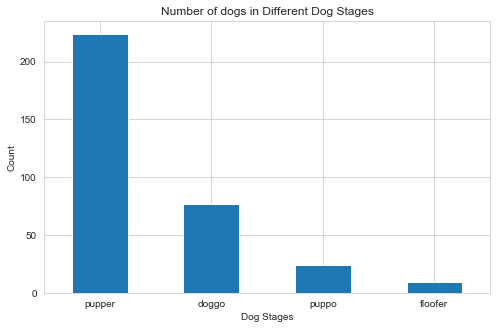

In [65]:
base_color =sns.color_palette()[0]
sns.set_style('whitegrid')
fig,ax = plt.subplots()
final.dog_stage.value_counts().sort_values(ascending = False).plot(kind= 'bar', color = base_color, figsize = (8,5));
ax.set(xlabel = 'Dog Stages', ylabel = 'Count');
plt.xticks(rotation = 0);
plt.title('Number of dogs in Different Dog Stages')
plt.savefig('1st_upt.png')

Around 230 of them are pupper and there are around 90 dogs that are doggo. The number of dogs in puppo and floofer stages constitutes a small share in total.

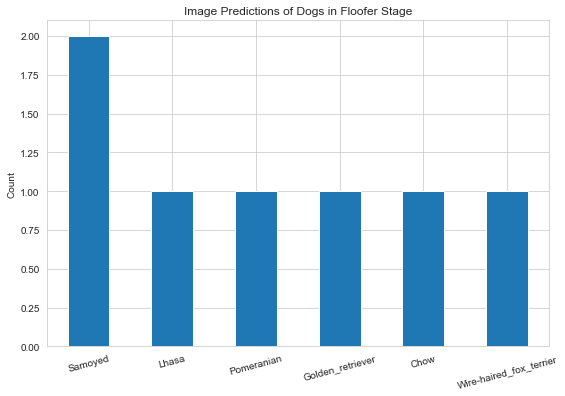

In [66]:
final[(final.dog_stage == 'floofer') & (final.p1_dog)].p1.value_counts().plot(kind = 'bar', color = base_color, figsize = (9,6));
plt.xticks(rotation = 15);
plt.ylabel('Count');
plt.title('Image Predictions of Dogs in Floofer Stage')
plt.savefig('2nd.png')

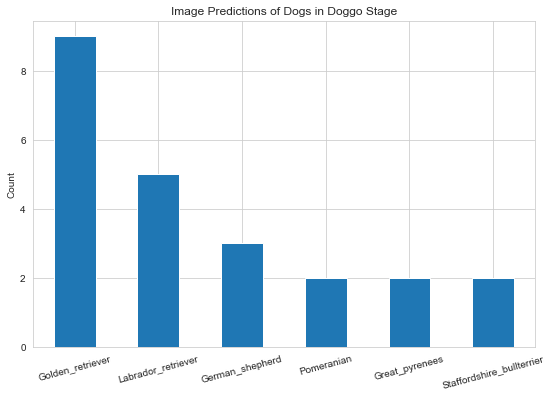

In [67]:
final[(final.dog_stage == 'doggo') & (final.p1_dog)].p1.value_counts()[:6].plot(kind = 'bar', color = base_color, figsize = (9,6));
plt.xticks(rotation = 15);
plt.ylabel('Count');
plt.title('Image Predictions of Dogs in Doggo Stage')
plt.savefig('3rd.png')

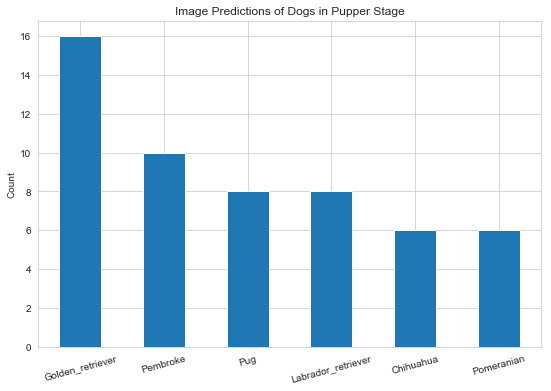

In [68]:
final[(final.dog_stage == 'pupper') & (final.p1_dog)].p1.value_counts()[:6].plot(kind = 'bar', color = base_color, figsize = (9,6));
plt.xticks(rotation = 15);
plt.ylabel('Count');
plt.title('Image Predictions of Dogs in Pupper Stage')
plt.savefig('4th.png')

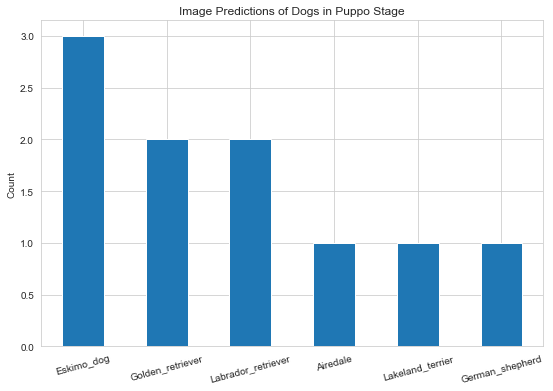

In [69]:
final[(final.dog_stage == 'puppo') & (final.p1_dog)].p1.value_counts()[:6].plot(kind = 'bar', color = base_color, figsize = (9,6));
plt.xticks(rotation = 15);
plt.ylabel('Count');
plt.title('Image Predictions of Dogs in Puppo Stage')
plt.savefig('5th.png')

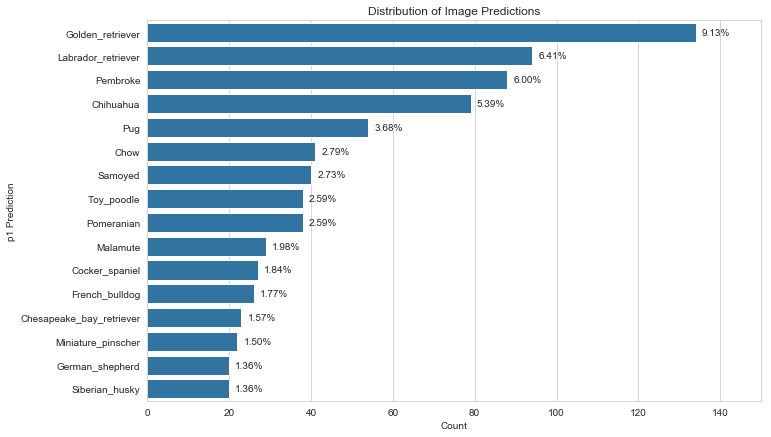

In [70]:
a = final[final.p1_dog == True].p1.value_counts().apply(lambda row: row >= 20)
ind = a[a == True].index
plot_data = final[(final.p1_dog == True) & (final.p1.isin(ind))]
plt.figure(figsize = (11, 7))
sns.countplot(data = plot_data, y = 'p1',color = base_color, order = ind);
plt.xlim((0, 150))
plt.xlabel('Count')
plt.ylabel('p1 Prediction')

counts = final[final.p1_dog == True].p1.value_counts()
total = final[final.p1_dog == True].shape[0]

for i in range(len(counts)):
    if counts[i] >=20:
        text = '{:0.2f}%'.format(counts[i]*100/total)
        plt.text(counts[i]+5, i, text, va = 'center', ha = 'center')
plt.title('Distribution of Image Predictions')
plt.savefig('6th.png')

9.4% of pictures are Golden Retrievers. It is followed by Labrador Retriever with 6.5%. Pembroke has the third place. 6% of posted pictures is Pembroke. The most of the pictures postd from this account is Golden Retriever pictures.

In [71]:
# to be able to better assess the average rating in each dog breed
# I drop all outlier samples with rating numerator greater than 15
# There are only 5 samples with numerator greater than 15

index_to_drop = final[final.rating_numerator > 15].rating_numerator.index
final.drop(index_to_drop,inplace = True)  

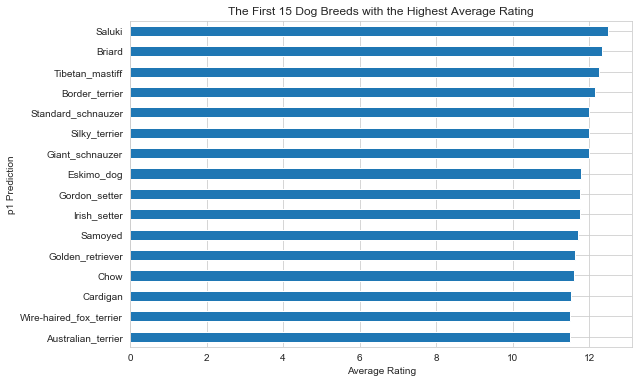

In [72]:
final[final.p1_dog == True].groupby('p1').rating_numerator.mean().sort_values(ascending = False)[:16][::-1].plot(kind = 'barh',color = base_color, figsize = (9,6));
plt.ylabel('p1 Prediction');
plt.xlabel('Average Rating');
plt.title('The First 15 Dog Breeds with the Highest Average Rating')
plt.savefig('7th.png')

The dog breed with the highest rating is Saluki. Briard is in the second place and Tibetan Mastiff is in the third place. The most common dog breed Golden Breed gets on average larger than 11 and it is in 13rd place in dogs with the highest average ranking.

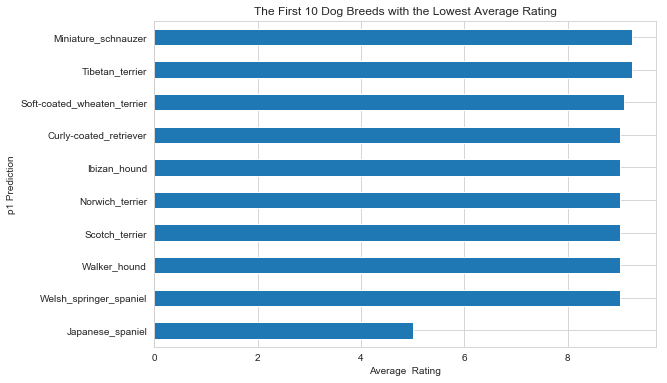

In [73]:
final[final.p1_dog == True].groupby('p1').rating_numerator.mean().sort_values(ascending = False)[-10:][::-1].plot(kind = 'barh',color = base_color, figsize = (9,6));
plt.ylabel('p1 Prediction');
plt.xlabel('Average  Rating');
plt.title('The First 10 Dog Breeds with the Lowest Average Rating')
plt.savefig('8th.png')

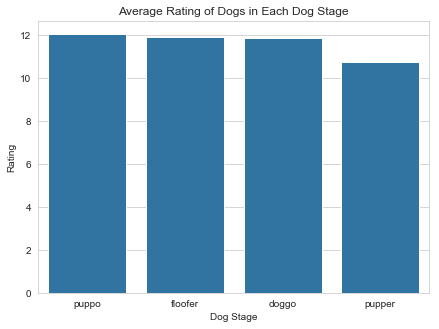

In [74]:
order = final.groupby('dog_stage').rating_numerator.mean().sort_values(ascending = False).index
plt.figure(figsize = (7,5))
sns.barplot(data = final, x = 'dog_stage', y = 'rating_numerator', order = order,color = base_color, ci = None);
plt.xlabel('Dog Stage');
plt.ylabel('Rating');
plt.title('Average Rating of Dogs in Each Dog Stage')
plt.savefig('9th.png')